# Comparison of Strategies to Inform K-Means Clustering
GitHub Repository: https://github.com/CJTAYL/USL

# Problem Addressed

K-means is a popular unsupervised learning algorithm used for clustering tasks. Despite its popularlity, it can be difficult to use K-means in some contexts due to the requirement that the number of clusters be chosen before the algorithm has been implemented. Two quantitative ways to address this issue are with an Elbow Plot and Silhouette Score.

The Elbow Plot has been described as coarse, and the Silhouette Score is often recommended in its place [1]. However, it is often better to evaluate a specific scenario and make a decision based on the data.

The purpose of this project is to compare the results of two K-means clustering algorithms informed by an Elbow Plot and Silhouette Score. The algorithms' performance will be evaluated with three metrics:
- Davies-Bouldin Index
- Calinski-Harabasz Index
- Adjusted Rand Index

## Description of Data

The dataset was retrived from a publically available GitHub repository, which can be accessed at the following website: https://raw.githubusercontent.com/CJTAYL/USL/main/seeds_dataset.txt

The dataset was originally published in a study by Charytanowicz et al. [2]. A citation for the data can be found below:

- Charytanowicz, M., Niewczas, J., Kulczycki, P., Kowalski, P. and Lukasik, S. (2012). Seeds. UCI Machine Learning Repository. https://doi.org/10.24432/C5H30K.

The dataset is comprised of 210 entries and eight variables. Variables 1 - 7 are continuous variables representing the geometric properties of wheat seeds and Variable 8 is a discrete variable representing three varieties of wheat: Kama, Rosa, and Canadian. A total of 70 samples were randomly selected from each variety.

The geometric properties of the wheat seeds were:
- area
- perimeter
- compactness
- kernel length
- kernel width
- asymmetry coefficient
- kernel groove length

In [94]:
import pandas as pd
import requests

raw_url = 'https://raw.githubusercontent.com/CJTAYL/USL/main/seeds_dataset.txt'

# Use pandas to read the text file with whitespace delimiter
df = pd.read_csv(raw_url, delim_whitespace=True, header=None)

# Rename columns
df.columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'variety']

# Convert 'type' to a categorical type
df['variety'] = df['variety'].astype('category')

# Display the first 5 rows of dataframe
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   area         210 non-null    float64 
 1   perimeter    210 non-null    float64 
 2   compactness  210 non-null    float64 
 3   length       210 non-null    float64 
 4   width        210 non-null    float64 
 5   asymmetry    210 non-null    float64 
 6   groove       210 non-null    float64 
 7   variety      210 non-null    category
dtypes: category(1), float64(7)
memory usage: 11.9 KB


In [96]:
df.describe(include='all')

,area,perimeter,compactness,length,width,asymmetry,groove,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,NaN
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,NaN
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,NaN
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,NaN
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,NaN
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,NaN


The dataset is comprised of seven continuous variables and one discrete variable. There are no missing values.

# Exploratory Data Analysis

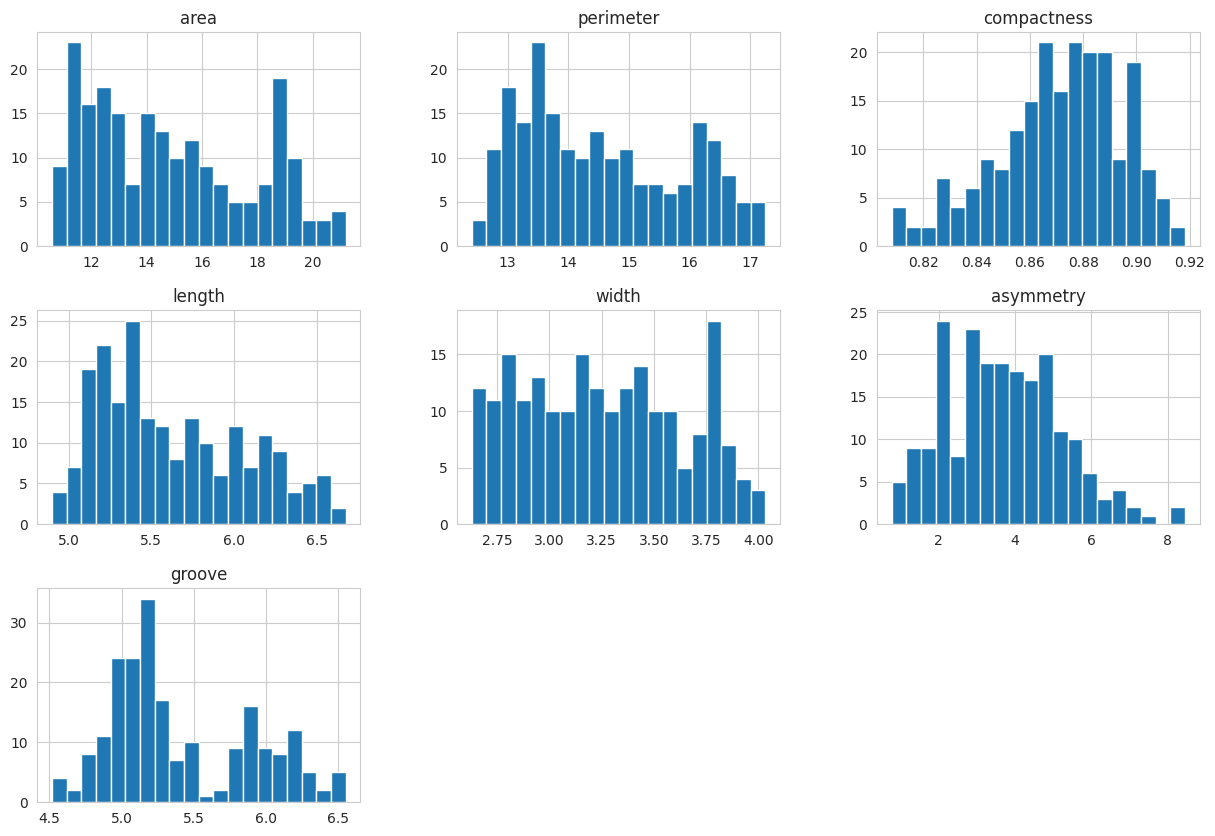

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

df.hist(figsize=(15, 10), bins=20)
plt.show()

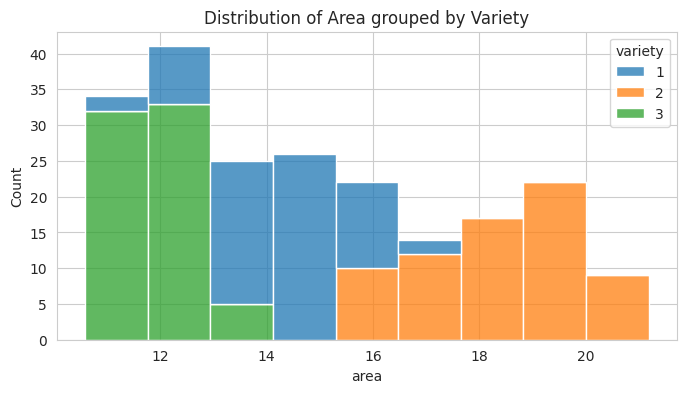

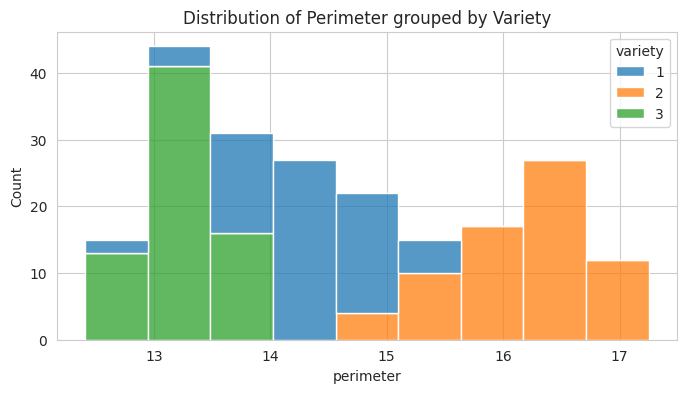

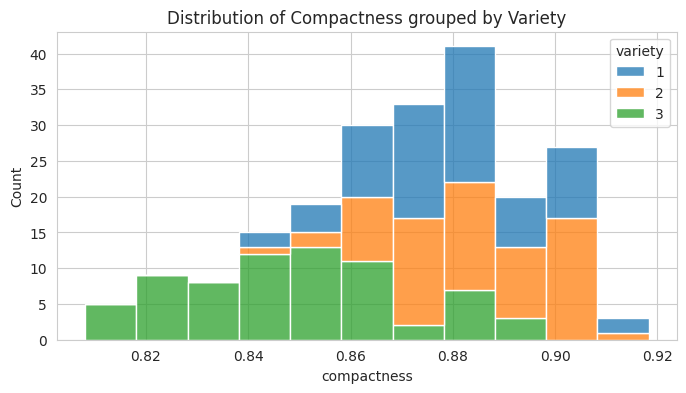

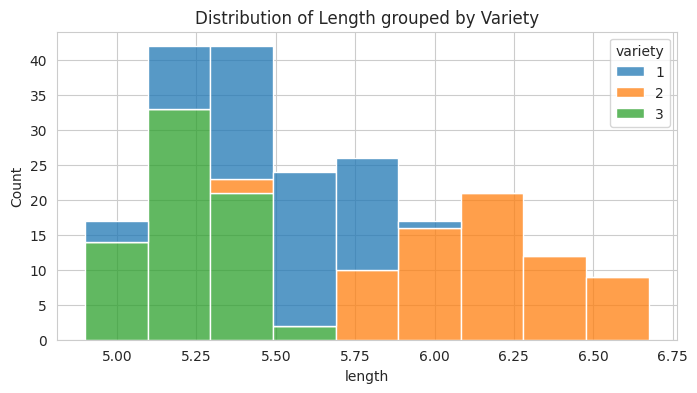

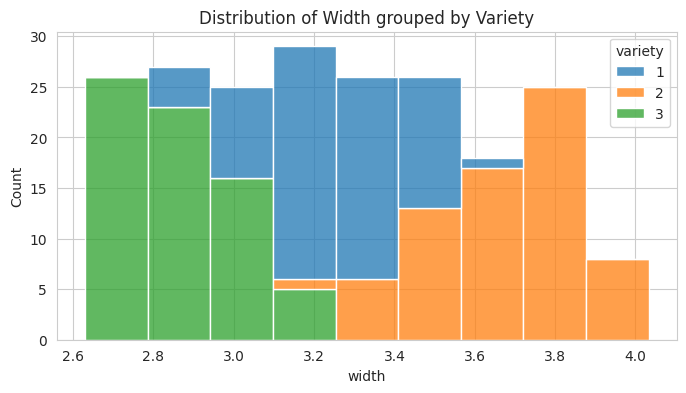

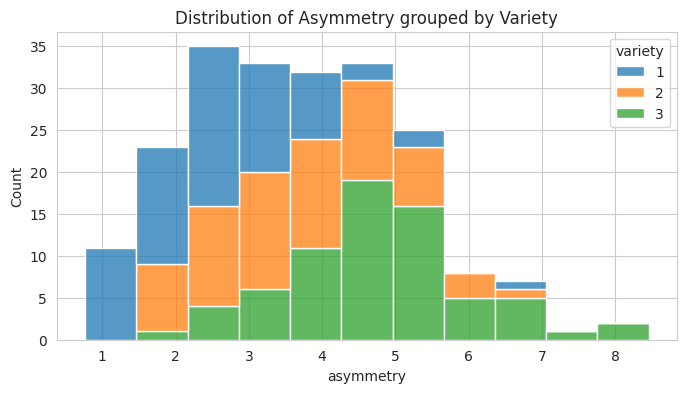

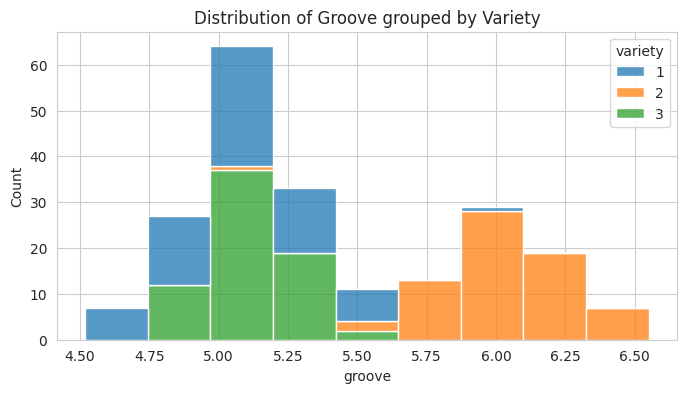

In [98]:
categorical_column = 'variety'
numeric_columns = df.select_dtypes(include=['float64']).columns

# Loop through numeric variables, plot against variety
for variable in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=variable, hue=categorical_column, element='bars', multiple='stack')
    plt.title(f'Distribution of {variable.capitalize()} grouped by Variety')
    plt.show()

In [99]:
df.skew(numeric_only=True)

area           0.399889
perimeter      0.386573
compactness   -0.537954
length         0.525482
width          0.134378
asymmetry      0.401667
groove         0.561897
dtype: float64

Based on the histograms and the ouput of the `skew()` method, the data appear to be multimodal with some skew. The distributions are consistent with the presence of different varieties of wheat which have different physical attributes.

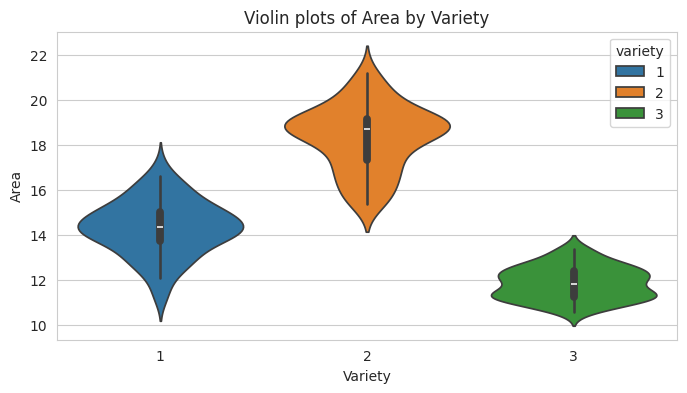

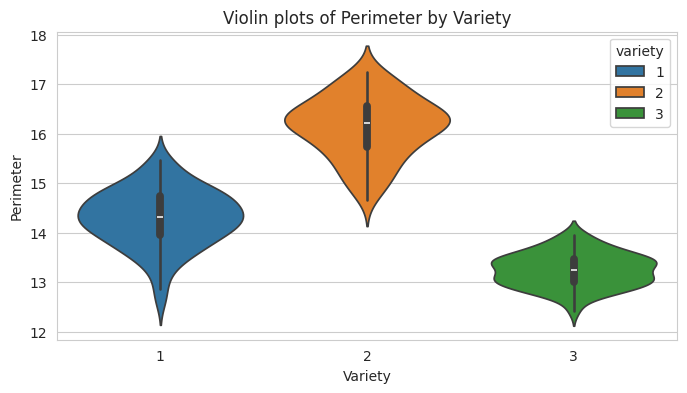

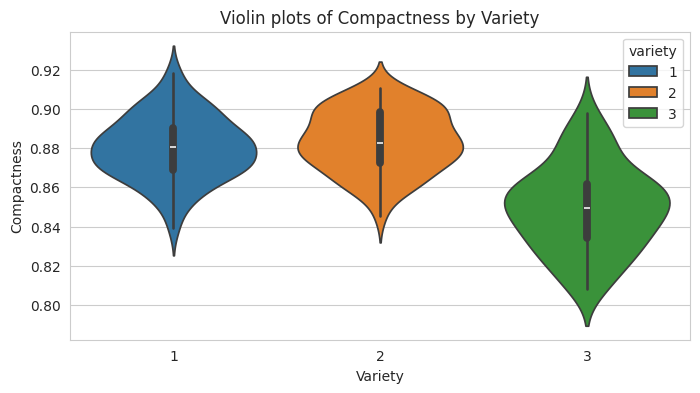

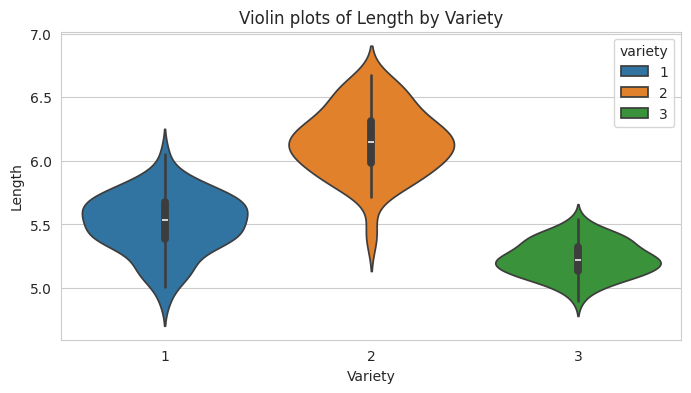

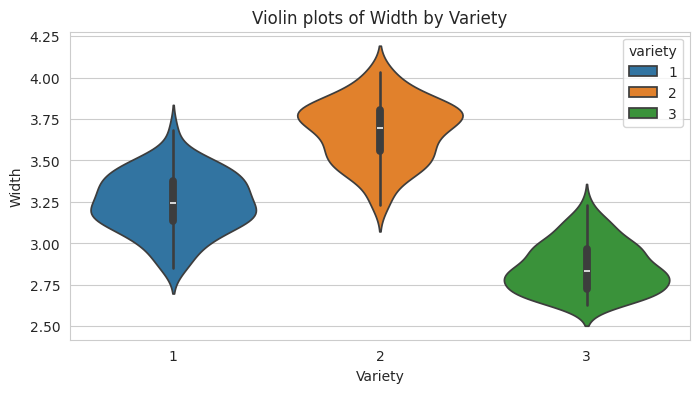

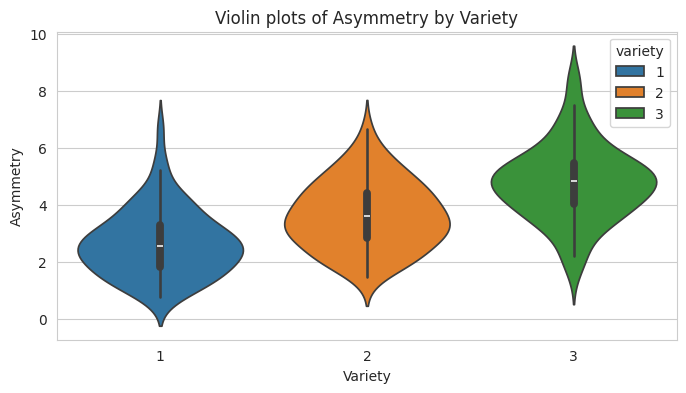

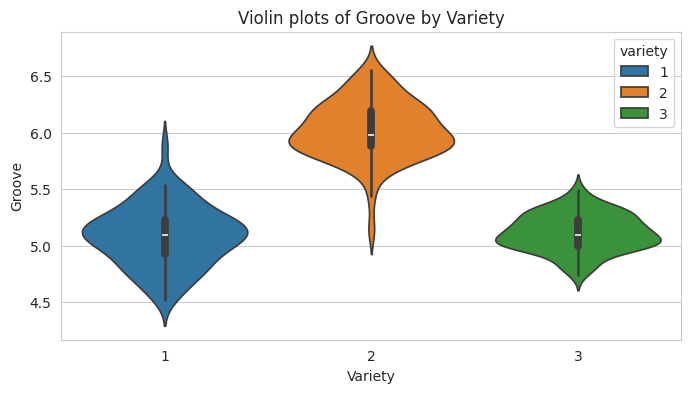

In [100]:
# Loop through numeric variables, plot against variety
for variable in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=categorical_column, y=variable, hue=categorical_column, data=df)
    plt.xlabel('Variety')
    plt.ylabel(f'{variable.capitalize()}')
    plt.title(f'Violin plots of {variable.capitalize()} by {categorical_column.capitalize()}')
    plt.show()

The violin plots show the distributions and the median of the potential features grouped by variety.

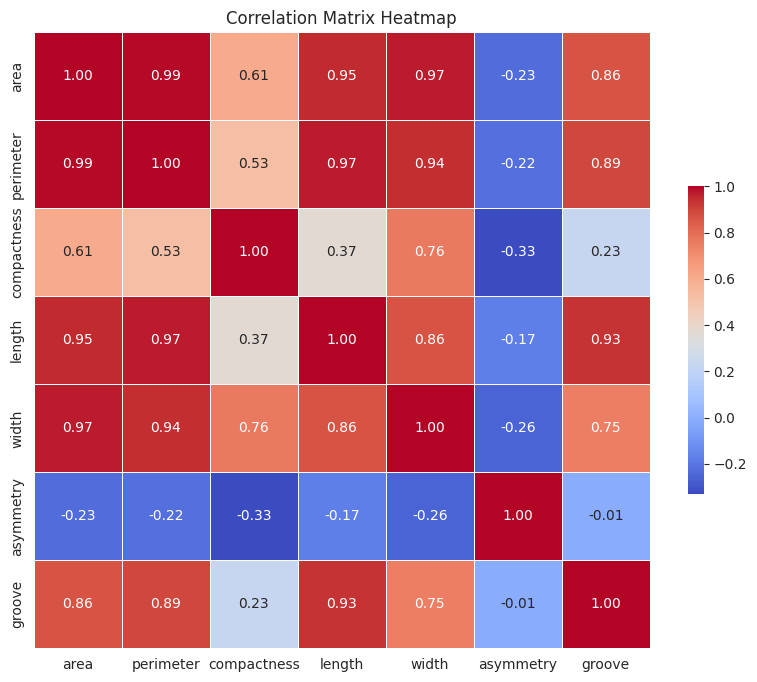

In [101]:
# Create correlation matrix
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})

plt.title('Correlation Matrix Heatmap')
plt.show()

There are strong to very strong correlations in the dataset. Correlated features can negatively impact K-means clustering; however, a principal component analysis will be conducted on the data, which will address the issue.

# Data Preparation

In [102]:
# Set aside ground truth for ARI (see results and analysis section)
ground_truth = df['variety']

In [103]:
# Verify description of data
ground_truth.value_counts()

1    70
2    70
3    70
Name: variety, dtype: int64

For the K-means algorithm to perform correctly, the data must be scaled. To scale the data, `StandardScaler` from `sklearn.preprocessing` will be used.

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Scale the data, drop the ground truth labels
ct = ColumnTransformer([
    ('scale', StandardScaler(), numeric_columns)
], remainder='drop')

df_scaled = ct.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns.tolist())

In [105]:
df_scaled.head()

,area,perimeter,compactness,length,width,asymmetry,groove
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


## Dimension Reduction with Principal Component Analysis

Principal Component Analysis (PCA) is a dimension reduction algorithm that is used frequently by data scientists. It identifies the axis that accounts for the greatest amount of variance in the data. In the current project, the goal was to find the number of principal components that could account for 95% of the variance in the data.

In [106]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) # account for 95% of the variance
reduced_features = pca.fit_transform(df_scaled)

explained_variances = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variances)
cumulative_variance = [round(num, 2) for num in cumulative_variance]

print(f'Cumulative Variance: {cumulative_variance}')

Cumulative Variance: [0.72, 0.89, 0.99]


In [107]:
# Check dimensions of reduced features
reduced_features.ndim

2

# K-Means Algorithm Informed by Elbow Method

## Selecting the Number of Clusters

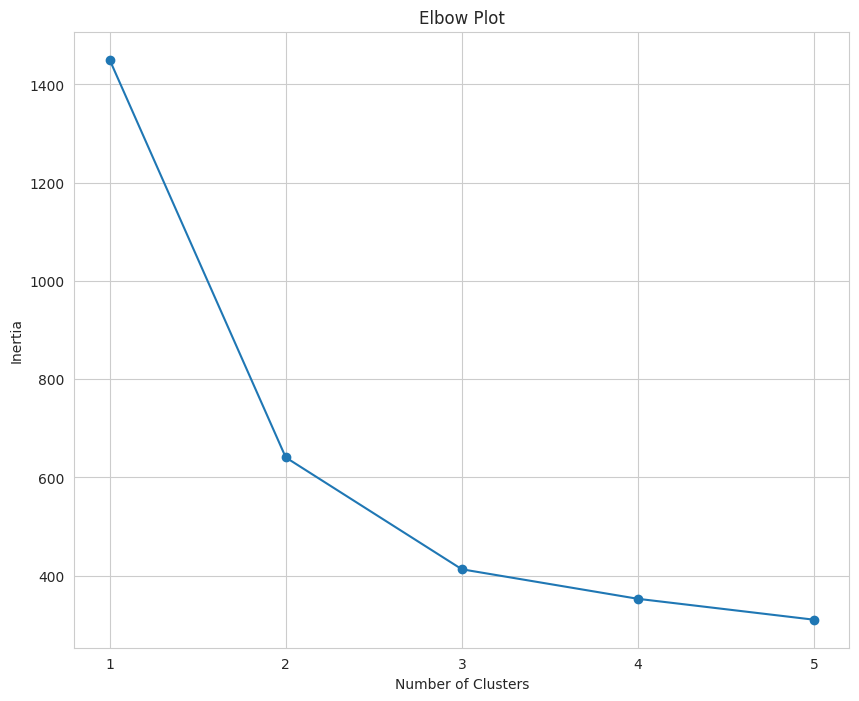

In [108]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 6)

# Calculate inertia for the range of k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(reduced_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()

In [109]:
k = 3 # Set value of k equal to 3

kmeans = KMeans(n_clusters=k, random_state=2, n_init='auto')
clusters = kmeans.fit_predict(reduced_features)

cluster_assignments = pd.DataFrame({'symbol': df.index,
                                    'cluster': clusters})

# Sort value by cluster
sorted_assignments = cluster_assignments.sort_values(by='cluster')

In [110]:
sorted_assignments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 209 to 0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   symbol   210 non-null    int64
 1   cluster  210 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 4.1 KB


In [111]:
# Convert assignments to same scale as 'variety'
sorted_assignments['cluster'] = [num + 1 for num in sorted_assignments['cluster']]

In [112]:
# Convert 'cluster' to category type
sorted_assignments['cluster'] = sorted_assignments['cluster'].astype('category')

In [113]:
centroids = kmeans.cluster_centers_
print('Centroids:\n', centroids)

Centroids:
 [[-2.3880096  -0.7588527  -0.0118409 ]
 [ 2.72693997 -0.40271886 -0.03125845]
 [-0.47553565  1.03354327  0.03943667]]


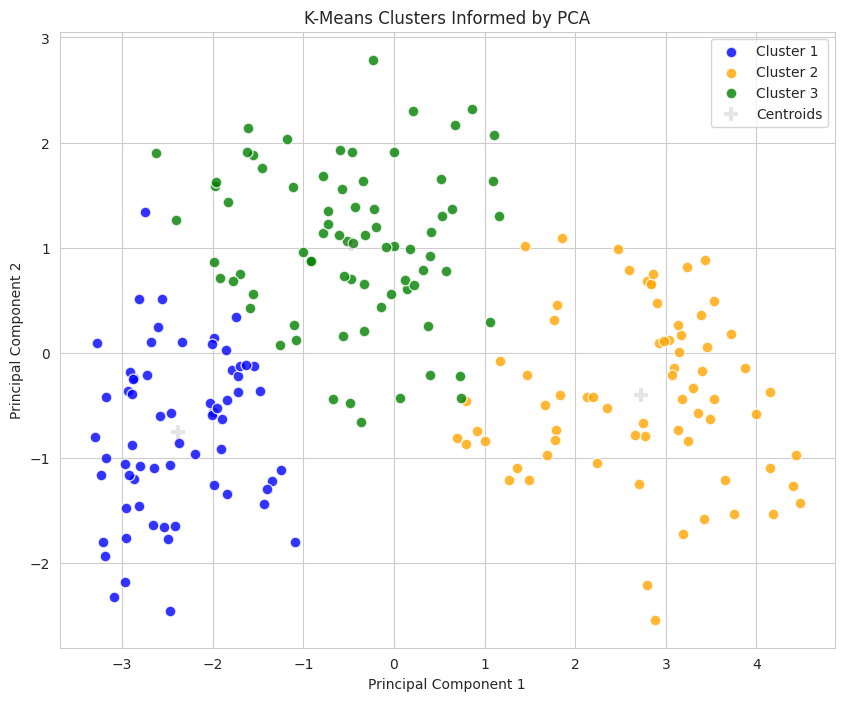

In [114]:
plt.figure(figsize=(10, 8))

# Colors for each cluster
colors = ['blue', 'orange', 'green']

# Plot each cluster
for i, color in enumerate(colors):
    # Select only data points that belong to the current cluster
    ix = np.where(clusters == i)
    plt.scatter(reduced_features[ix, 0], reduced_features[ix, 1], c=[color], label=f'Cluster {i+1}', s=60, alpha=0.8, edgecolor='w')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=100, alpha=0.2, linewidths=3, color='gray', zorder=10, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Informed by PCA')

# Display the legend
plt.legend()

plt.show()

In [115]:
# Print value counts for clusters
sorted_assignments['cluster'].value_counts()

3    75
2    70
1    65
Name: cluster, dtype: int64

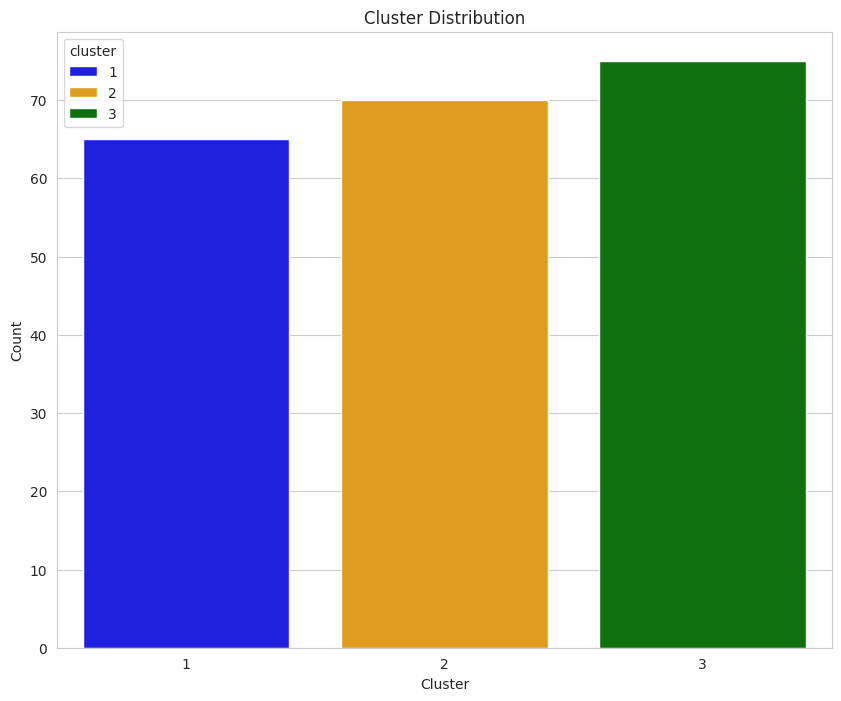

In [116]:
plt.figure(figsize=(10,8))

sns.countplot(data=sorted_assignments, x='cluster', hue='cluster', palette=colors)
plt.title('Cluster Distribution')
plt.ylabel('Count')
plt.xlabel('Cluster')
plt.show()

In [117]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score

# Calculate metrics
silhouette_avg = silhouette_score(reduced_features, kmeans.labels_)
davies_boulding = davies_bouldin_score(reduced_features, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(reduced_features, kmeans.labels_)
adj_rand = adjusted_rand_score(ground_truth, kmeans.labels_)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_boulding}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Ajusted Rand Index: {adj_rand}')

Silhouette Score: 0.41225677057178894
Davies-Bouldin Index: 0.891967185123475
Calinski-Harabasz Index: 259.83668751473334
Ajusted Rand Index: 0.7730246875577171


# K-Means Algorithm Informed by Silhouette Score

## Calculate Potential Silhouette Scores

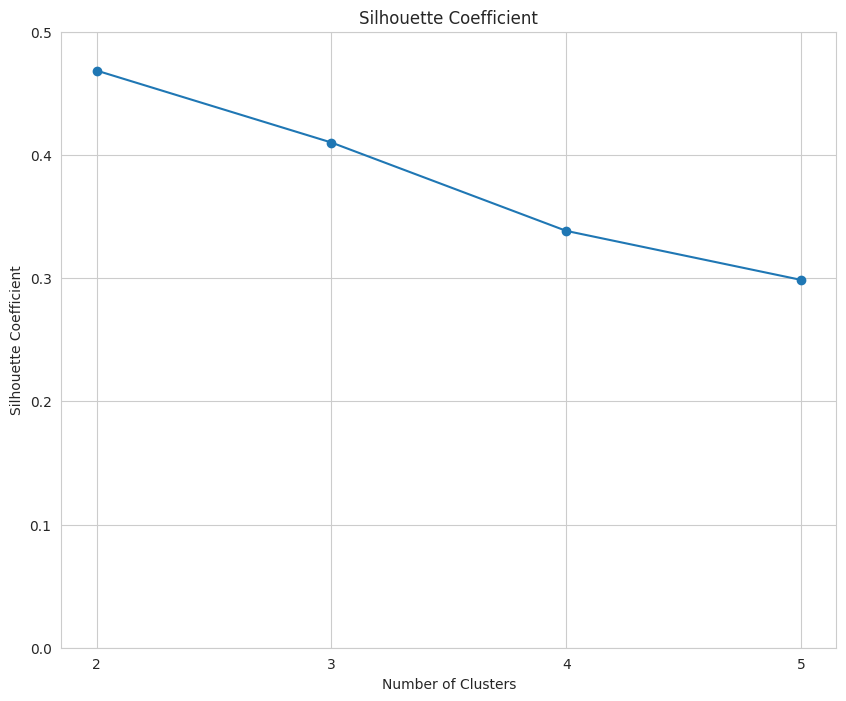

In [118]:
silhouette_scores = []

K_range = range(2, 6)

# Calculate Silhouette Coefficient for range of k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto')
    cluster_labels = kmeans.fit_predict(reduced_features)
    silhouette_avg = silhouette_score(reduced_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 8))

plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.ylim(0, 0.5)
plt.xticks(K_range)
plt.show()


In [119]:
k = 2 # Set k to the value with the highest Silhouette Coefficient

kmeans = KMeans(n_clusters=k, random_state=4, n_init='auto')
clusters = kmeans.fit_predict(reduced_features)

cluster_assignments2 = pd.DataFrame({'symbol': df.index,
                                    'cluster': clusters})

sorted_assignments2 = cluster_assignments2.sort_values(by='cluster')

In [120]:
sorted_assignments2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 104 to 209
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   symbol   210 non-null    int64
 1   cluster  210 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 4.1 KB


In [121]:
# Convert assignments to same scale as 'variety'
sorted_assignments2['cluster'] = [num + 1 for num in sorted_assignments2['cluster']]

In [122]:
sorted_assignments2['cluster'] = sorted_assignments2['cluster'].astype('category')

In [123]:
centroids = kmeans.cluster_centers_
print('Centroids:\n', centroids)

Centroids:
 [[ 2.49405708 -0.21138733 -0.01841166]
 [-1.53480436  0.13008451  0.01133025]]


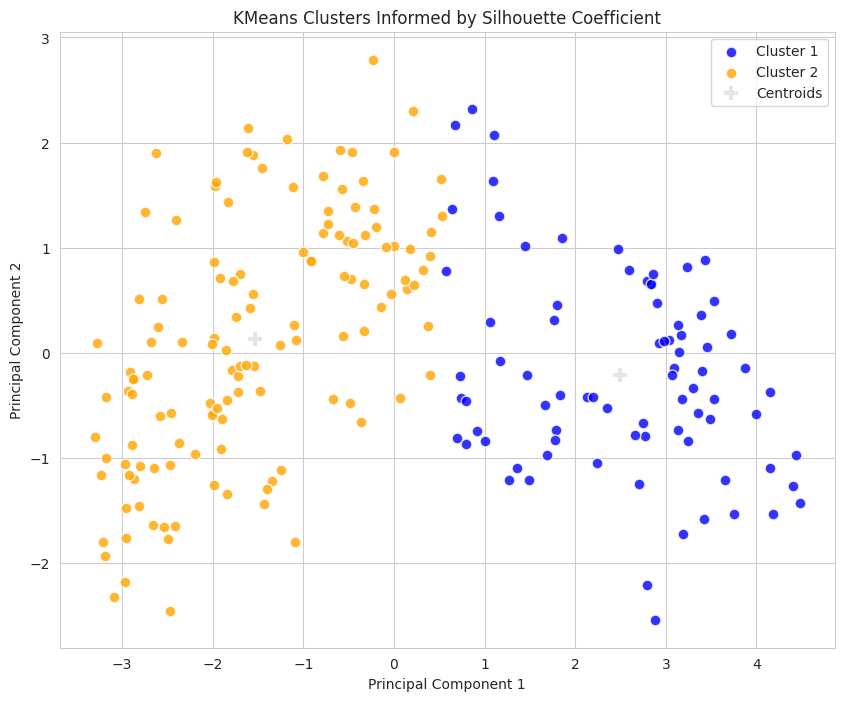

In [124]:
plt.figure(figsize=(10, 8))

# Colors for each cluster
colors = ['blue', 'orange']

# Plot each cluster
for i, color in enumerate(colors):
    # Select only data points that belong to the current cluster
    ix = np.where(clusters == i)
    plt.scatter(reduced_features[ix, 0], reduced_features[ix, 1], c=[color], label=f'Cluster {i+1}', s=60, alpha=0.8, edgecolor='w')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=100, alpha=0.2, linewidths=3, color='gray', zorder=10, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters Informed by Silhouette Coefficient')

# Display the legend
plt.legend()

plt.show()

In [125]:
# Print value counts for categories
sorted_assignments2['cluster'].value_counts()

2    130
1     80
Name: cluster, dtype: int64

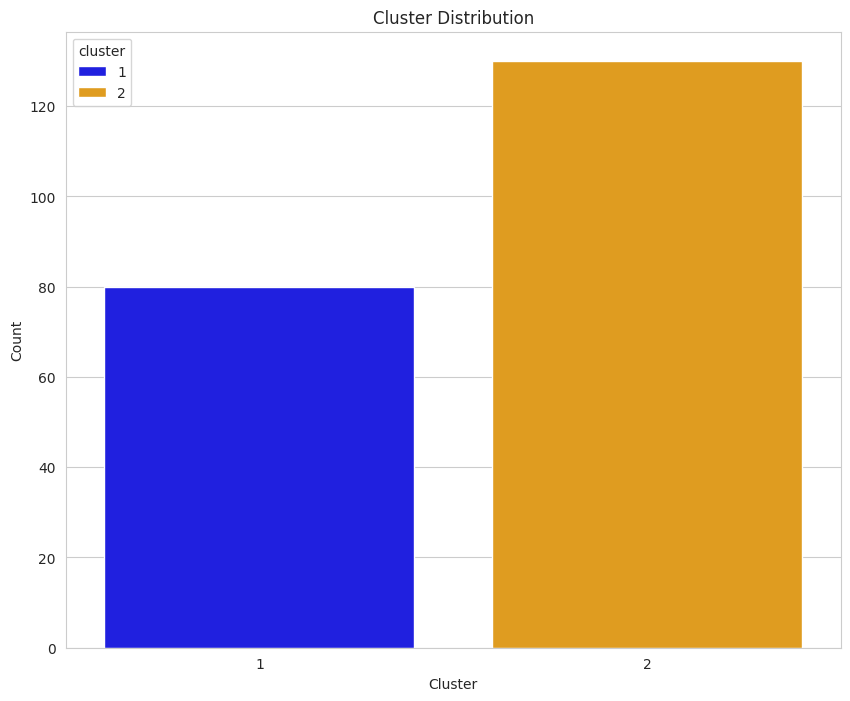

In [126]:
plt.figure(figsize=(10,8))

sns.countplot(data=sorted_assignments2, x='cluster', hue='cluster', palette=colors)
plt.title('Cluster Distribution')
plt.ylabel('Count')
plt.xlabel('Cluster')
plt.show()

In [127]:
# Calculate metrics
ss_silhouette_avg = silhouette_score(reduced_features, kmeans.labels_)
ss_davies_boulding = davies_bouldin_score(reduced_features, kmeans.labels_)
ss_calinski_harabasz = calinski_harabasz_score(reduced_features, kmeans.labels_)
ss_adj_rand = adjusted_rand_score(ground_truth, kmeans.labels_)

print(f'Silhouette Score: {ss_silhouette_avg}')
print(f'Davies-Bouldin Index: {ss_davies_boulding}')
print(f'Calinski-Harabasz Index: {ss_calinski_harabasz}')
print(f'Adjusted Rand Index: {ss_adj_rand}')

Silhouette Score: 0.46849496863820117
Davies-Bouldin Index: 0.7947218992989975
Calinski-Harabasz Index: 262.8372675890969
Adjusted Rand Index: 0.5074767556450577


# Results and Analysis

In [128]:
from tabulate import tabulate

metrics = ['Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Adjusted Rand Index']
elbow_plot = [davies_boulding, calinski_harabasz, adj_rand]
silh_score = [ss_davies_boulding, ss_calinski_harabasz, ss_adj_rand]
interpretation = ['SS', 'SS', 'EP']

scores_df = pd.DataFrame(zip(metrics, elbow_plot, silh_score, interpretation),
                         columns=['Metric', 'Elbow Plot', 'Silhouette Score',
                                  'Favors'])

# Convert DataFrame to a table
print(tabulate(scores_df, headers='keys', tablefmt='fancy_grid', colalign='left'))

╒════╤═════════════════════════╤══════════════╤════════════════════╤══════════╕
│    │                  Metric │   Elbow Plot │   Silhouette Score │ Favors   │
╞════╪═════════════════════════╪══════════════╪════════════════════╪══════════╡
│ 0  │ Davies-Bouldin Index    │ 0.891967     │ 0.794722           │ SS       │
├────┼─────────────────────────┼──────────────┼────────────────────┼──────────┤
│ 1  │ Calinski-Harabasz Index │ 259.837      │ 262.837            │ SS       │
├────┼─────────────────────────┼──────────────┼────────────────────┼──────────┤
│ 2  │ Adjusted Rand Index     │ 0.773025     │ 0.507477           │ EP       │
╘════╧═════════════════════════╧══════════════╧════════════════════╧══════════╛


A brief description of how to interpret the three metrics can be found below:
- Davies-Bouldin Index: Lower scores are better and indicate the clusters are compact and well-separated
- Calinski-Harabasz: Higher scores are better and indicate the clusters are dense and separated
- Adjusted Rand Index: Values range from -1 to 1, where 1 indicates perfect agreement between ground truth and clustering labels and 0 indicates random or independent cluster assignments.

On two of the three metrics, the algorithm using Silhouette Score performed better. However, the metric that incorporated ground truth labels favored the algorithm using Elbow Plot performed better.

Considering the difference between the Adjusted Rand Index scores and the metric's incorporation of ground truth labels, it's outcome is considered more impactful than the combination of the other two metrics. Moreover, information about the dataset indicated that there were three vareity of seeds represented in the sample, which correpsonds to the number of groups suggested by the Elbow Plot.

# Conclusion

Based on the available evidence, the K-means algorithm informed by the Elbow Plot performed better on the clustering task.

From this project, I learned that is best to test general advice before choosing the best approach to solve a specific problem. Additionally, I gained experience with different metrics that can be used to measure the output of a clustering algorithm.

Future iterations of this project may utilize different dimension reduction techniques to examine their effects on K-means clustering. Some of these techniques may include multi-dimensional scaling, isomap, and t-distributed stochastic neighbor embedding. Additionally, they may also include other datasets to determine if a general pattern emerges.

# References

[1] Géron, A. (2021). Hands-on machine learning with scikit-learn, keras & tensorflow: Concepts, tools, and techniques to build intelligent systems. O'Reilly Press.

[2] Charytanowicz, M., Niewczas, J., Kulczycki, P., Kowalski, P.A., Łukasik, S., & Zak, S. (2010). Complete Gradient Clustering Algorithm for Features Analysis of X-Ray Images.